In [1]:
import numpy as np
import pandas as pd

In [2]:
# Dropping useless columns and renaming for clearity

df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
66,ham,"Today is \song dedicated day..\"" Which song wi..."
3431,spam,Camera - You are awarded a SiPix Digital Camer...
4679,ham,"That's cool he'll be here all night, lemme kno..."
3559,ham,Lol I know! Hey someone did a great inpersonat...
2862,ham,"Ok that would b lovely, if u r sure. Think abo..."


In [3]:
# Changing target column to 0 and 1 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
2169,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
4517,0,That sucks. So what do you got planned for you...
2824,1,Congratulations - Thanks to a good friend U ha...
4838,0,That's one of the issues but california is oka...
366,1,"Update_Now - Xmas Offer! Latest Motorola, Sony..."


In [4]:
# Finding duplicates, they exist
df.duplicated().sum()

np.int64(403)

In [5]:
# Removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

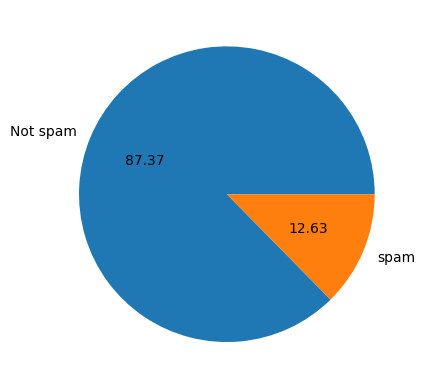

In [6]:
# Checking the percentage of spam and not spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Not spam','spam'], autopct="%0.2f")
plt.show()

In [7]:
# Making column of number of characters, number of words and number of sentences

import nltk
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)


,target,text,num_characters,num_words,num_sentences
771,0,Lol! U drunkard! Just doing my hair at d momen...,89,23,5
2822,0,Then u ask darren go n pick u lor... But i oso...,74,20,2
2577,0,Hey whats up? U sleeping all morning?,37,9,2
5454,0,Im just wondering what your doing right now?,44,9,1
918,0,Hey you gave them your photo when you register...,88,20,2


In [8]:
# Description of columns
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [9]:
# No Spam description

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [10]:
# Spam description

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

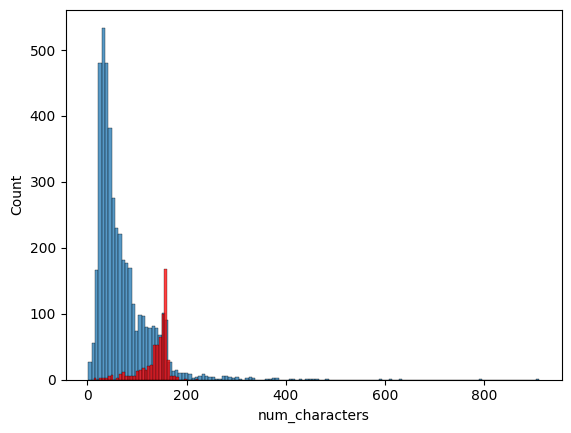

In [11]:
# Plotting the differences of unique features of spam and non spam (Characters)

import seaborn as sns

# Non Spam Histogram
sns.histplot(df[df['target'] == 0]['num_characters'])

# Spam Histogram 
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

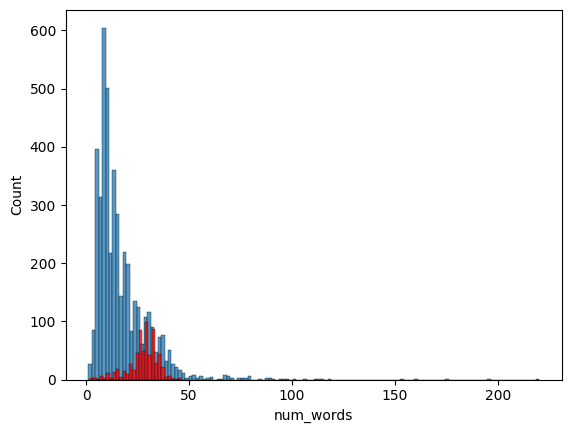

In [12]:
# Plotting the differences of unique features of spam and non spam (Words)

import seaborn as sns

# Non Spam Histogram
sns.histplot(df[df['target'] == 0]['num_words'])

# Spam Histogram 
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

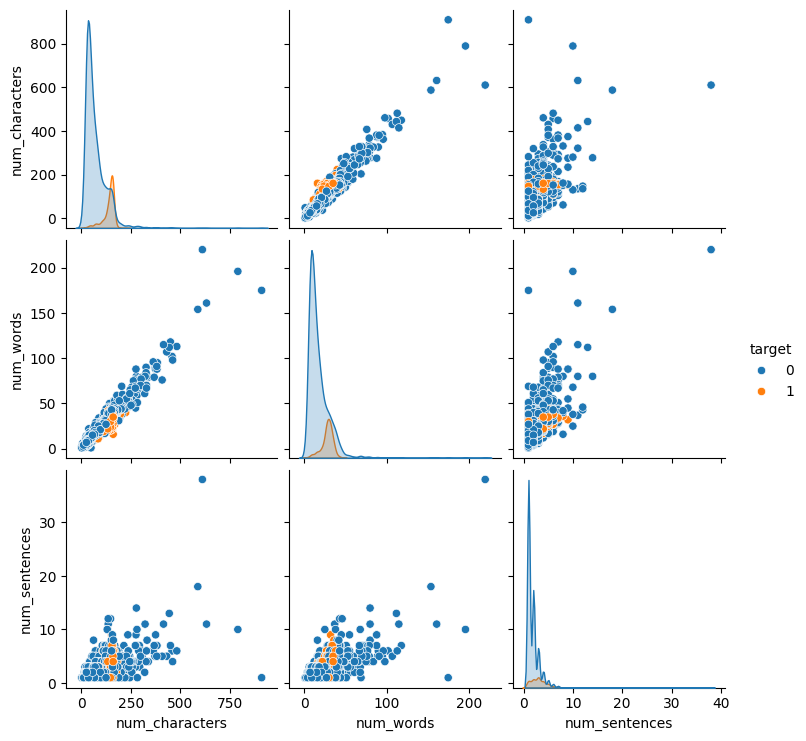

In [13]:
# Relationship between different columns
sns.pairplot(df, hue='target')

<Axes: >

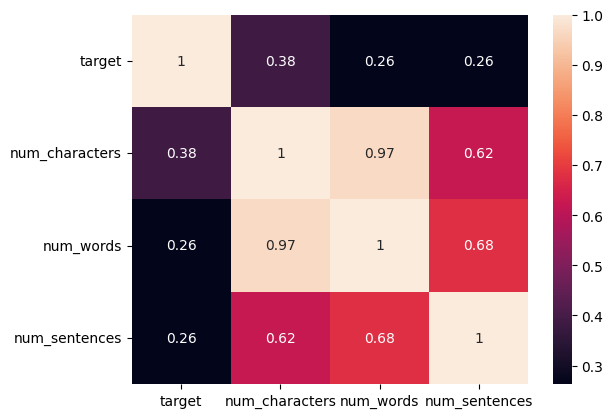

In [14]:
# Heat-Map of the correlation
# Here we got to know that num_characters is an important parameter
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
# Pre-Processing the Data

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text: 
        y.append(ps.stem(i))

    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
2053,0,Oh... I was thkin of goin yogasana at 10 den n...,125,34,2,oh thkin goin yogasana 10 den nd go 3 den rush...
4255,0,Aah! A cuddle would be lush! I'd need lots of ...,87,22,3,aah cuddl would lush need lot tea soup kind fumbl
2022,1,U can WIN å£100 of Music Gift Vouchers every w...,158,23,1,u win music gift voucher everi week start txt ...
5030,0,Hey... Very inconvenient for your sis a not huh?,48,11,2,hey inconveni si huh
1356,0,U ned to convince him tht its not possible wit...,81,16,1,u ned convinc tht possibl witot hurt feel main


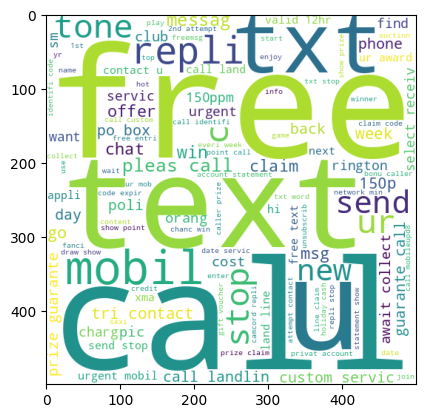

In [16]:
# Generating the Word-Cloud

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Spam WordCloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

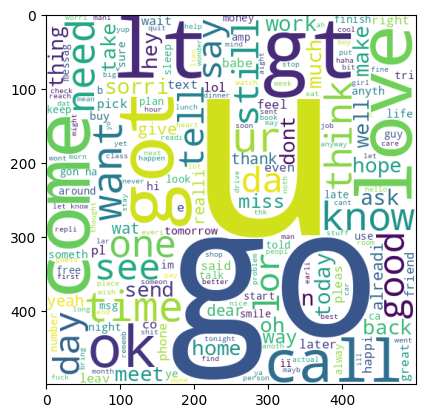

In [17]:
# Non Spam WordCloud
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

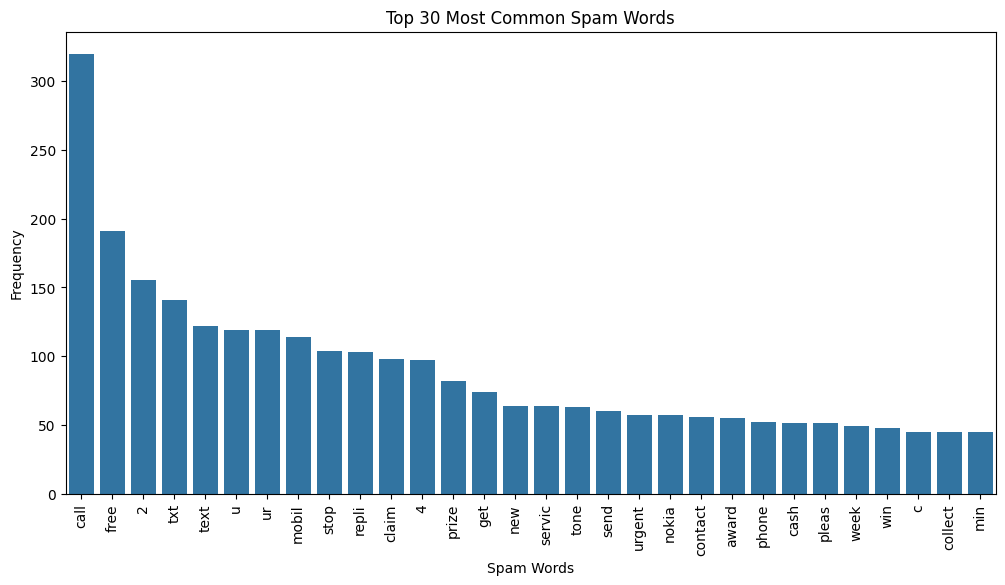

In [18]:
# Finding the top spam words and plotting them

spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
spam_common = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_common, columns=['word','count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_df)

plt.xticks(rotation='vertical')
plt.xlabel("Spam Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Spam Words")

plt.show()

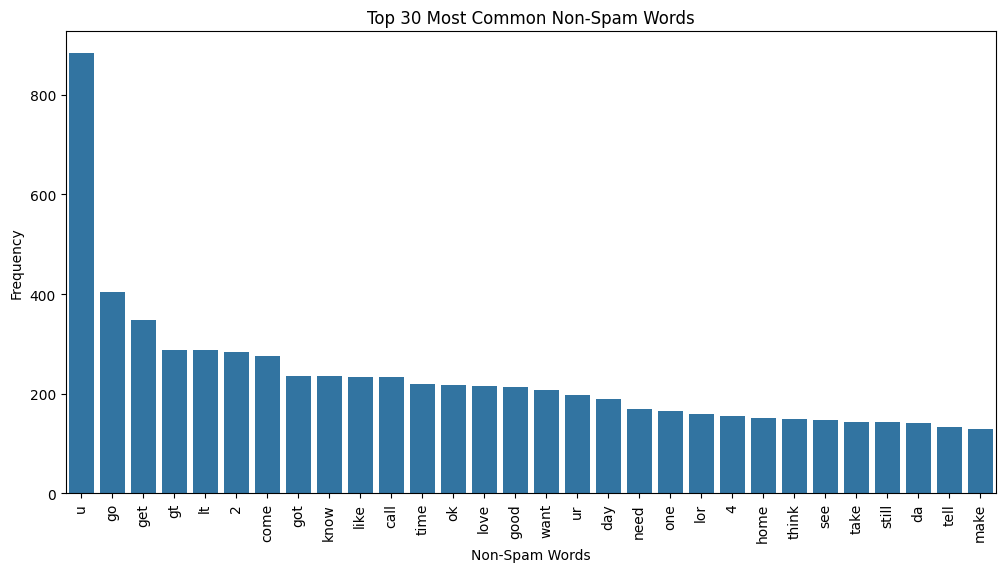

In [19]:
non_spam_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].dropna().tolist():
    non_spam_corpus.extend(msg.split())  

non_spam_common = Counter(non_spam_corpus).most_common(30)
non_spam_df = pd.DataFrame(non_spam_common, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=non_spam_df)

plt.xticks(rotation='vertical')
plt.xlabel("Non-Spam Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Non-Spam Words")

plt.show()

In [22]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

import pickle

# Save the fitted vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# Deployment 


/tmp/ipykernel_290176/2089110991.py:6: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  tfidf = pickle.load(open('vectorizer.pkl','rb'))
/mnt/FC828FA9828F674C/Coding/Machine Learning /Project/myenv/lib64/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/FC828FA9828F674C/Coding/Machine Learning /Project/myenv/lib64/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your 

DeltaGenerator()